In [1]:
library("dplyr")
library(tidyverse)
library(forecast)
library(readxl)
library('plm')
library(dlm)
library(ggplot2)
library(zoo)
library(lattice)
library(dygraphs)
library(MASS) 
library(PerformanceAnalytics)
library('pastecs')
library(sn)
library(tseries)
library(lubridate)
library(aTSA)
library("TTR")
library('TSstudio')
library("numDeriv")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 

In [135]:
require(ggfortify)  #for plotting timeseries
require('TTR')

In [7]:
getSymbols("NG", header=TRUE, row.names="Date")

[1] "NG"

In [8]:
# OHLCVA data
head(NG,n=3)

           NG.Open NG.High NG.Low NG.Close NG.Volume NG.Adjusted
2007-01-03   16.90   16.96  16.00    16.25    756800       16.25
2007-01-04   16.01   16.03  15.89    15.96    889700       15.96
2007-01-05   15.85   16.04  15.50    16.04    854500       16.04

In [9]:
summary(NG)

     Index               NG.Open          NG.High           NG.Low      
 Min.   :2007-01-03   Min.   : 0.450   Min.   : 0.480   Min.   : 0.370  
 1st Qu.:2010-04-18   1st Qu.: 3.810   1st Qu.: 3.890   1st Qu.: 3.720  
 Median :2013-07-31   Median : 4.780   Median : 4.900   Median : 4.655  
 Mean   :2013-07-30   Mean   : 6.261   Mean   : 6.403   Mean   : 6.105  
 3rd Qu.:2016-11-10   3rd Qu.: 7.490   3rd Qu.: 7.650   3rd Qu.: 7.315  
 Max.   :2020-02-28   Max.   :21.910   Max.   :21.910   Max.   :20.660  
    NG.Close       NG.Volume         NG.Adjusted   
 Min.   : 0.45   Min.   :   91800   Min.   : 0.45  
 1st Qu.: 3.80   1st Qu.: 1091975   1st Qu.: 3.80  
 Median : 4.78   Median : 1789450   Median : 4.78  
 Mean   : 6.25   Mean   : 2228297   Mean   : 6.25  
 3rd Qu.: 7.47   3rd Qu.: 2751000   3rd Qu.: 7.47  
 Max.   :20.94   Max.   :38135900   Max.   :20.94  

In [11]:
# Get OHLC data
price<-OHLC(NG)
price

           NG.Open NG.High NG.Low NG.Close
2007-01-03   16.90   16.96  16.00    16.25
2007-01-04   16.01   16.03  15.89    15.96
2007-01-05   15.85   16.04  15.50    16.04
2007-01-08   15.97   16.12  15.90    16.08
2007-01-09   16.08   16.08  15.87    15.97
2007-01-10   15.90   15.96  15.77    15.94
2007-01-11   15.92   15.96  15.75    15.78
2007-01-12   15.82   16.24  15.82    16.06
2007-01-16   16.07   16.18  15.93    16.01
2007-01-17   15.95   16.23  15.94    16.04
2007-01-18   16.05   16.06  15.95    16.01
2007-01-19   16.00   16.16  15.95    16.05
2007-01-22   16.02   16.06  15.95    16.01
2007-01-23   16.02   16.30  16.00    16.27
2007-01-24   16.19   16.39  16.07    16.38
2007-01-25   16.40   16.50  16.25    16.35
2007-01-26   16.34   16.41  16.27    16.41
2007-01-29   16.36   16.52  16.27    16.41
2007-01-30   16.26   16.44  16.25    16.43
2007-01-31   16.40   16.54  16.34    16.47
2007-02-01   16.50   16.62  16.36    16.49
2007-02-02   16.41   16.43  16.25    16.36
2007-02-05 

In [683]:
#tail(price, n=3)

In [12]:
str(price)

An 'xts' object on 2007-01-03/2020-02-28 containing:
  Data: num [1:3312, 1:4] 16.9 16 15.8 16 16.1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "NG.Open" "NG.High" "NG.Low" "NG.Close"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2020-03-02 19:06:08"


###### We can see the time series object i.e. a vector containing the data together with information about start/end time and sampling frequency (monthly)

In [13]:
colSums(is.na(price)) # checking missing values

NG.Open  NG.High   NG.Low NG.Close 
       0        0        0        0

In [14]:
dygraph(OHLC(price), ylab='Price (US$)')

HTML widgets cannot be represented in plain text (need html)

This series looks clearly non-stationary and in fact quite irregular. The analysis of non-stationary time series with ARMA models requires at least a preliminary transformation of the data to get stationarity; but we might feel more natural to have models which allow to analyze more directly data which show instability in the mean level and in the variance, structural breaks, sudden jumps.

- We can see from this time series that there is certainly some seasonal variation in the price; there is a peak every winter, and a trough every winter. 

- Again the it seems like this could be described using an additive model, as the seasonal fluctuations are roughly constant in size over time and do not seem to depend on the level of the time series, and the random fluctuations seem constant over time.

In [15]:
NG1 <- tail(price, n=30)
graph<-dygraph(OHLC(NG1), ylab = 'Price(US$)')
dyCandlestick(graph)

HTML widgets cannot be represented in plain text (need html)

In probability, a distribution is a table of values or a mathematical function that links every possible value of a variable to the probability that such value could occur. Probability distributions are usually (but not solely) represented in charts whose abscissa axis represents the possible values of the variable and whose ordinal axis represents the probability of occurrence. Most statistical models rely on a normal distribution, a distribution that is symmetric and has a characteristic bell shape.

In [16]:
# converting the objecvt to time-series
price <- ts(price$NG.Close, frequency = 12, start = c(2007, 3), end = c(2020, 2))
str(price)

 Time-Series [1:156, 1] from 2007 to 2020: 16.2 16 16 16.1 16 ...
 - attr(*, ".indexCLASS")= chr "Date"
 - attr(*, "tclass")= chr "Date"
 - attr(*, ".indexTZ")= chr "UTC"
 - attr(*, "tzone")= chr "UTC"
 - attr(*, "src")= chr "yahoo"
 - attr(*, "updated")= POSIXct[1:1], format: "2020-03-02 19:06:08"
 - attr(*, "index")= num [1:156] 1.17e+09 1.17e+09 1.17e+09 1.17e+09 1.17e+09 ...
  ..- attr(*, "tzone")= chr "UTC"
  ..- attr(*, "tclass")= chr "Date"
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "NG.Close"


In [17]:
price

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2007,,,16.25,15.96,16.04,16.08,15.97,15.94,15.78,16.06,16.01,16.04
2008,16.01,16.05,16.01,16.27,16.38,16.35,16.41,16.41,16.43,16.47,16.49,16.36
2009,16.41,16.51,16.48,16.57,16.57,16.62,16.66,16.68,16.72,16.50,16.47,16.81
2010,16.65,16.70,17.14,16.38,16.57,16.59,16.30,16.10,16.50,16.58,16.56,16.50
2011,16.54,16.31,16.50,16.59,16.90,16.72,16.60,16.60,16.66,16.57,16.79,16.66
2012,16.98,17.00,16.95,17.16,17.13,17.32,17.42,16.98,16.83,16.86,17.04,17.72
2013,17.67,17.57,17.40,16.05,16.18,15.35,14.71,15.13,14.71,14.73,14.20,13.88
2014,14.72,14.77,14.90,14.97,14.80,14.75,14.29,14.49,14.22,13.88,13.67,13.61
2015,14.34,14.71,14.05,15.16,14.30,14.62,14.95,15.12,15.65,15.71,15.87,15.54
2016,15.58,15.46,14.88,14.82,14.40,14.66,14.90,14.66,14.55,14.57,14.67,14.41


In [18]:
summary(price)

    NG.Close    
 Min.   :13.61  
 1st Qu.:14.87  
 Median :15.96  
 Mean   :15.74  
 3rd Qu.:16.52  
 Max.   :17.72  

In [423]:
#price <- as.data.frame (price)
#price

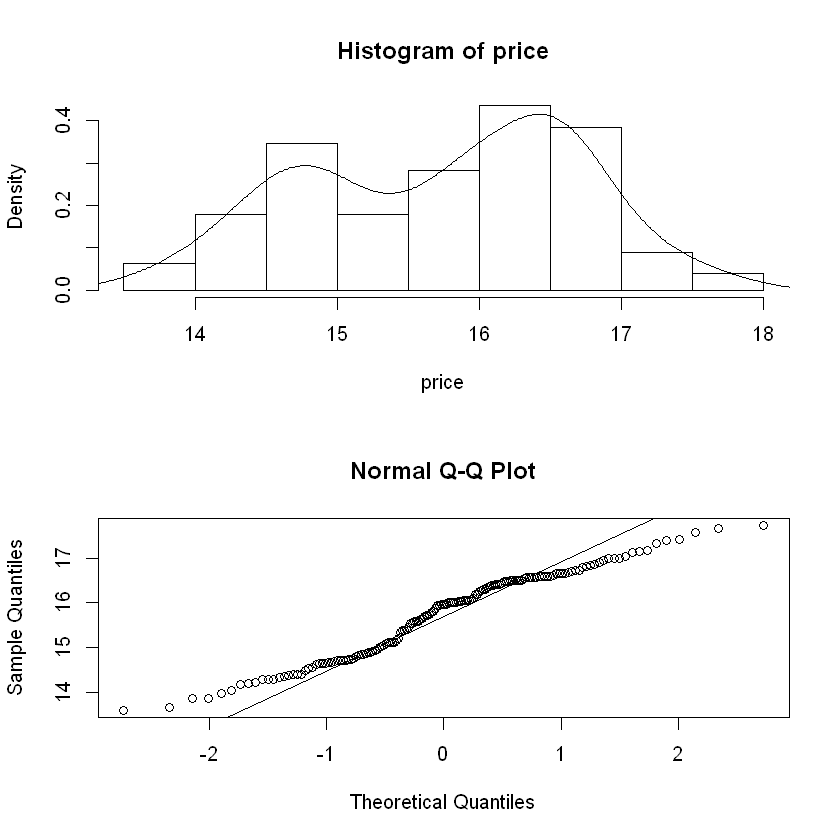

In [19]:
par(mfrow=c(2,1))        # set up the graphics 
hist(price, prob=TRUE, 12)   # histogram    
lines(density(price))     # density for details 
qqnorm(price)             # normal Q-Q plot  
qqline(price)


In [20]:
stat.desc(price, basic=TRUE, norm=TRUE, p=0.95)

,NG.Close
nbr.val,1.560000e+02
nbr.null,0.000000e+00
nbr.na,0.000000e+00
min,1.361000e+01
max,1.772000e+01
range,4.109999e+00
sum,2.455900e+03
median,1.596000e+01
mean,1.574295e+01
SE.mean,7.717983e-02


## Stationarity test

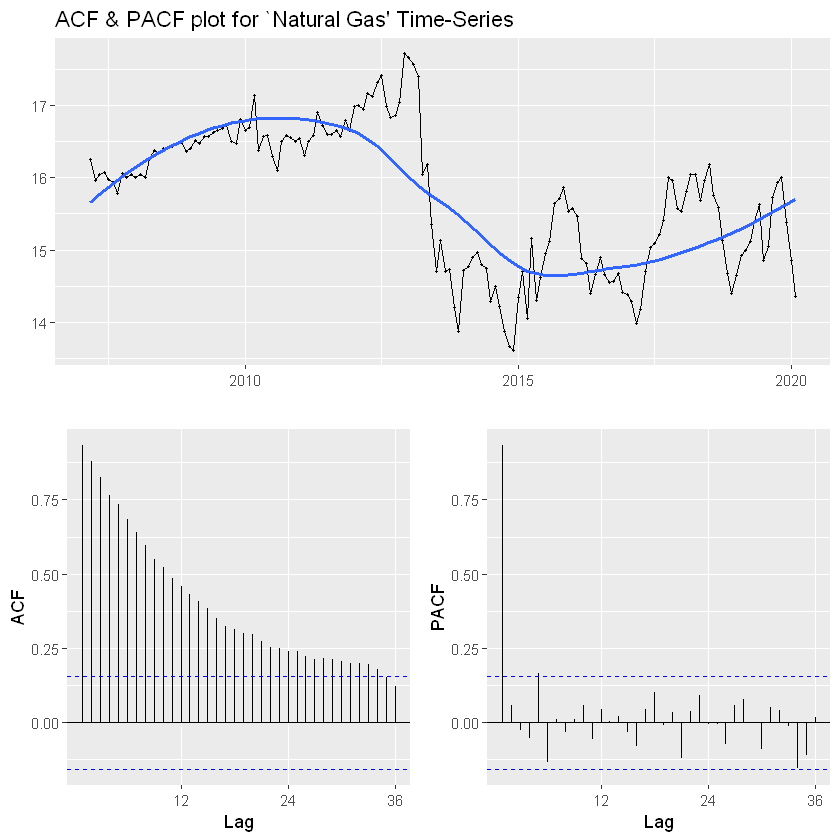

In [143]:
ggtsdisplay(price,
            plot.type = "partial",
            main = "ACF & PACF plot for `Natural Gas' Time-Series",
            smooth = TRUE) 

In [144]:
adf.test(price) #to check for the stationarity of the time series
pp.test(price)
kpss.test(price)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -0.575   0.473
[2,]   1 -0.513   0.495
[3,]   2 -0.523   0.492
[4,]   3 -0.541   0.485
[5,]   4 -0.513   0.495
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.94   0.350
[2,]   1 -1.82   0.400
[3,]   2 -1.92   0.358
[4,]   3 -2.13   0.280
[5,]   4 -1.69   0.450
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -2.62   0.315
[2,]   1 -2.58   0.334
[3,]   2 -2.72   0.274
[4,]   3 -3.02   0.149
[5,]   4 -2.49   0.371
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag  Z_rho p.value
   4 -0.148   0.657
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4 -8.64   0.243
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4 -14.5   0.245
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 
KPSS Unit Root Test 
alternative: nonsta

## Normalization

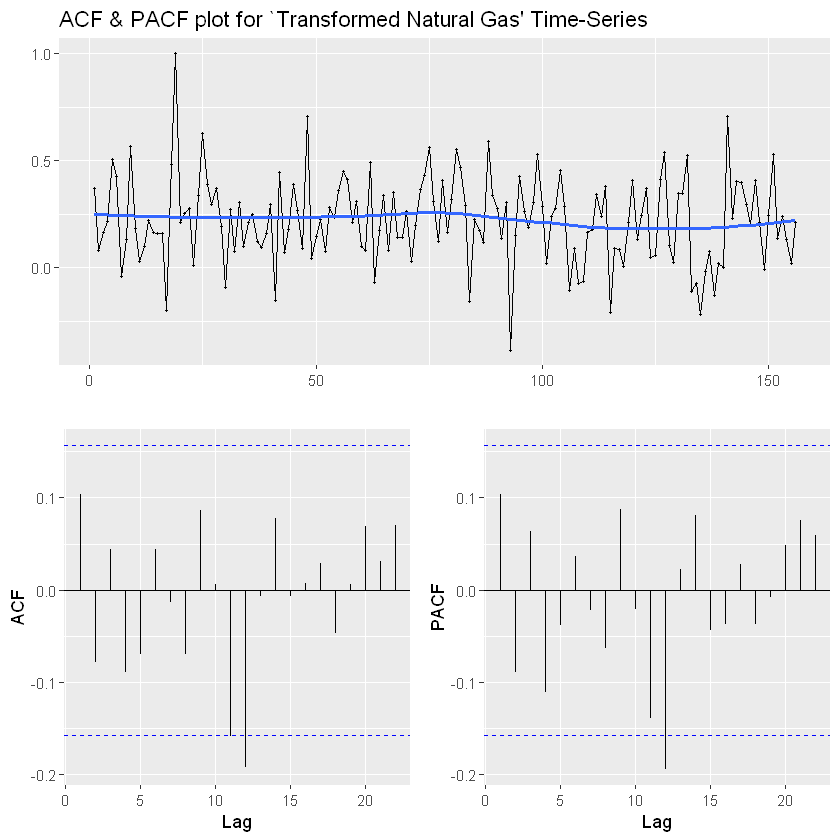

In [148]:
# the stationary time series using mean & std
NG_stationary <- rnorm(length(price), mean=1, sd=1) 

# time series with a trend
NG_trend <- cumsum(rnorm(length(price), mean=1, sd=4)) + price/100 


# normalize each trend & starionary
NG_stationary <- NG_stationary / max(NG_stationary) 
NG_trend <- NG_trend / max(NG_trend)

ggtsdisplay(NG_stationary,
            plot.type = "partial",
            main = "ACF & PACF plot for `Transformed Natural Gas' Time-Series",
            smooth = TRUE) 

We see here that:
- the stationary signal has very few lags exceeding the CI of the ACF . 
- The trend resulted in almost all lags exceeding the confidence interval. 

Therefore, it can be concluded that the ACF signal is stationary. But, the trend signal is not stationary . 
The stationary series has a better variance around the mean level, and the peaks are evidence of the interventions in the original series.

We will further decompose the time series which normally involves a combination of level, trend, seasonality, and noise components. Decomposition helps to provide a better understanding of problems during analysis and forecasting.

In [149]:
adf.test(NG_stationary) #to check for the stationarity of the time series
pp.test(NG_stationary)
kpss.test(NG_stationary)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -6.37  0.0100
[2,]   1 -4.36  0.0100
[3,]   2 -2.97  0.0100
[4,]   3 -2.60  0.0100
[5,]   4 -2.28  0.0232
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -11.17    0.01
[2,]   1  -8.99    0.01
[3,]   2  -6.74    0.01
[4,]   3  -6.56    0.01
[5,]   4  -5.97    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -11.21    0.01
[2,]   1  -9.08    0.01
[3,]   2  -6.85    0.01
[4,]   3  -6.70    0.01
[5,]   4  -6.08    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   4 -64.4    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4  -133    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4  -133    0.01
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 
KPSS Unit Root Test 
alternative: no

## Decomposing

Decomposing a time series means separating it into it’s constituent components, which are often a trend component and a random component, and if the data is seasonal, a seasonal component.

### Decomposing non-Seasonal Data
Non-seasonal time series consist of a trend component and a random component. Decomposing the time series involves tying to separate the time series into these individual components.

One way to do this is using some smoothing method, such as a simple moving average. The SMA function takes a span argument as n order. To calculate the moving average of order 5, we set n = 5.

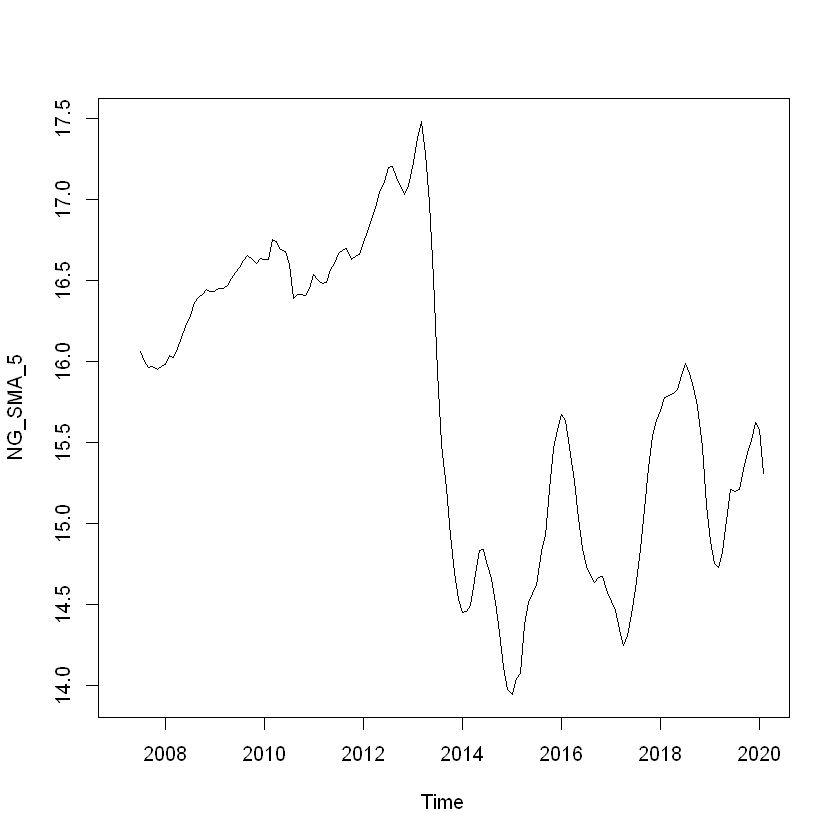

In [24]:
# simple moving average smoothing method of the time series to estimate the trend component.
NG_SMA_5 <- SMA(price, n=5) # smoothing with moving average 5
plot.ts(NG_SMA_5)

##### This is better, we can see that the Natural Gas price has declined from dollar 17.5  to  less than dollar 14  duirng 2014-2015 and highly volatile since then with current hovering around dollar 15 

## Decomposing Seasonal Data

A seasonal time series, in addition to the trend and random components, also has a seasonal component. Decomposing a seasonal time series means separating the time series into these three components. Lets estimate the trend, seasonal, and random components of the Natural Gas TS.

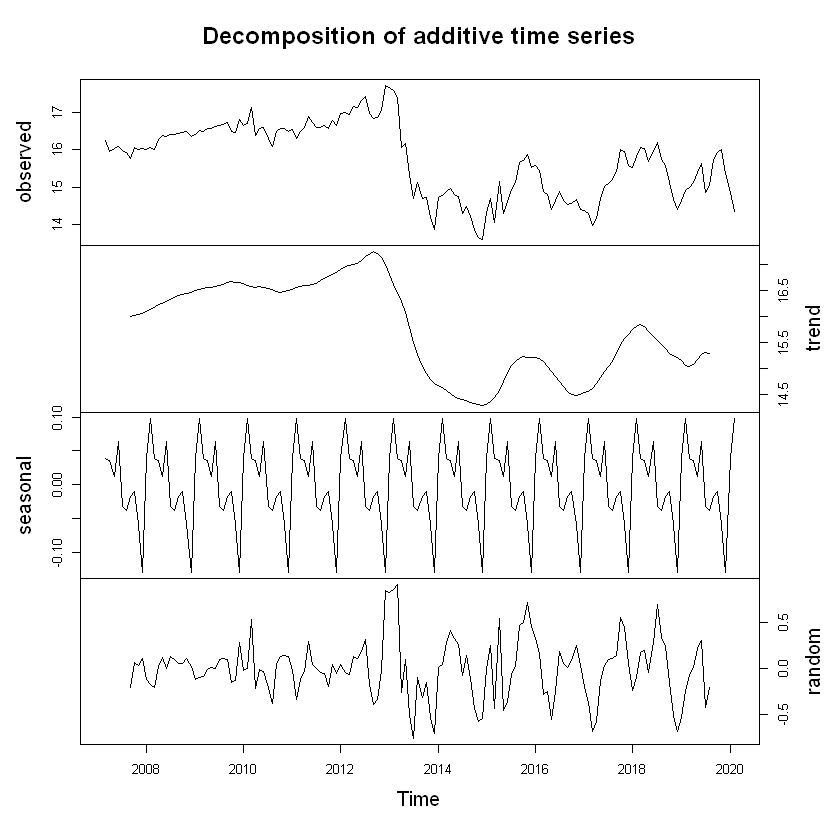

In [25]:
NG_comp <- decompose(price)
plot(NG_comp, yax.flip=TRUE)

The above plot shows-
- the original time series (top), 
- the estimated trend component (second from top), 
- the estimated seasonal component (third from top), and 
- the estimated irregular component (bottom).

We see that the estimated trend component shows a significant decrease from about 17 in 2013 to about 13 in 2015 followed by a highly volatile state since then.

We also see that from 2007 till 2013, there was a growing trend and seasonal component; but since 2013 the price fell sharply and influenced by high volatility and seasonal component with random motion.

### Perform filtering, smoothing, and forecasting for univariate and multivariate linear Gaussian state space models. 

There is no universally accepted notation for state space models, and this is unfortunatelyreflected in different names being used for the same quantities by the different contributedpackages.  However, the most commonly used notations in statistical and econometricapplications originated in the work by Harrison and Stevens (1976), was further popularized by West and Harrison (1997), and it is the one commonly adopted in the statistical (and Bayesian in particular) literature.  The notation is also different for filtered and smoothed estimates and their variances. The main focus is on Bayesian analysis hwoever, maximum likelihood estimation of unknown parameters is also supported.  


## Structural time series
Structural time series models are (linear Gaussian) state-space models for (univariate) time series based on a decomposition of the series into a number of components. They are specified by a set of error variances, some of which may be zero.

StructTShas the advantage of being of simple usageand quite reliable.  It gives the main tools for fitting a structural model for a time series by maximum likelihood; the options"level","trend","BSM"are used to fit a local level model,a local linear trend, or a local trend with an additional seasonal component (basic structural model). 
### Basic Stuctural Model (BSM)
The basic structural model, type = "BSM", is a local trend model with an additional seasonal component. 


Call:
StructTS(x = price, type = "level")

Variances:
   level   epsilon  
0.098819  0.005093  

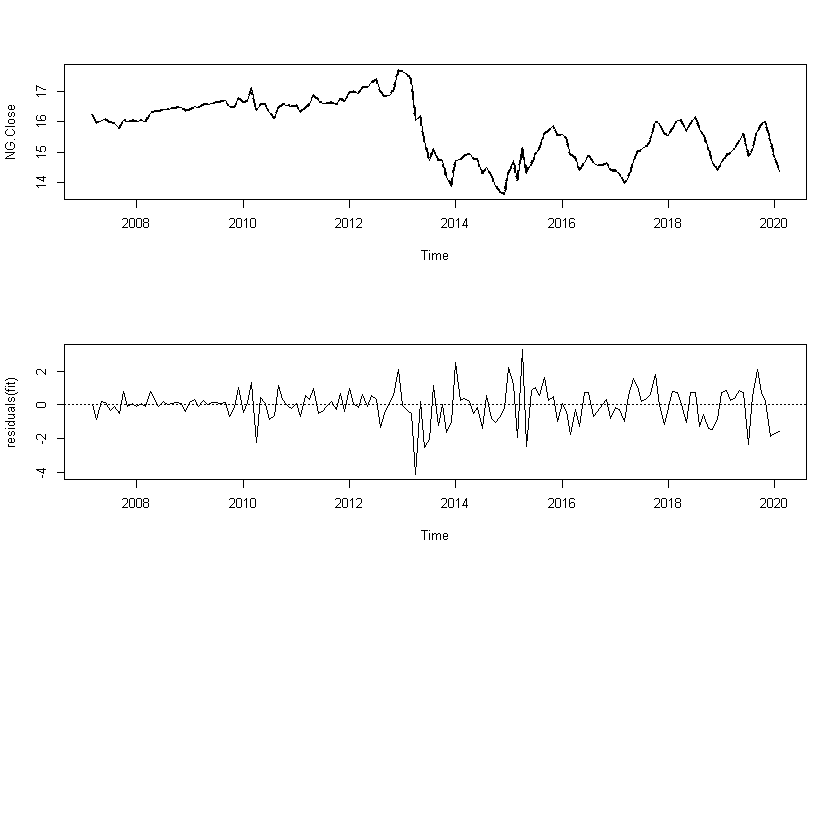

In [172]:
## Structural time series models
par(mfrow = c(3, 1))
plot(price)

## local level model
(fit <- StructTS(price, type = "level"))

lines(fitted(fit), lty = "dashed", lwd = 2)  # contemporaneous smoothing
lines(tsSmooth(fit), lty = "dotted", lwd = 2) # fixed-interval smoothing
plot(residuals(fit)); abline(h = 0, lty = 3)


- The maximum likelihood estimates (MLEs) of the level and observation error variances, 0.098 and 0.005 respectively.



Call:
StructTS(x = price, type = "trend")

Variances:
   level     slope   epsilon  
0.099106  0.000000  0.004861  

final  value -0.522249 
converged



Call:
StructTS(x = price, type = "BSM", fixed = c(0.1, 0.001, NA, NA), optim.control = list(trace = TRUE))

Variances:
   level     slope      seas   epsilon  
0.100000  0.001000  0.000000  0.004609  

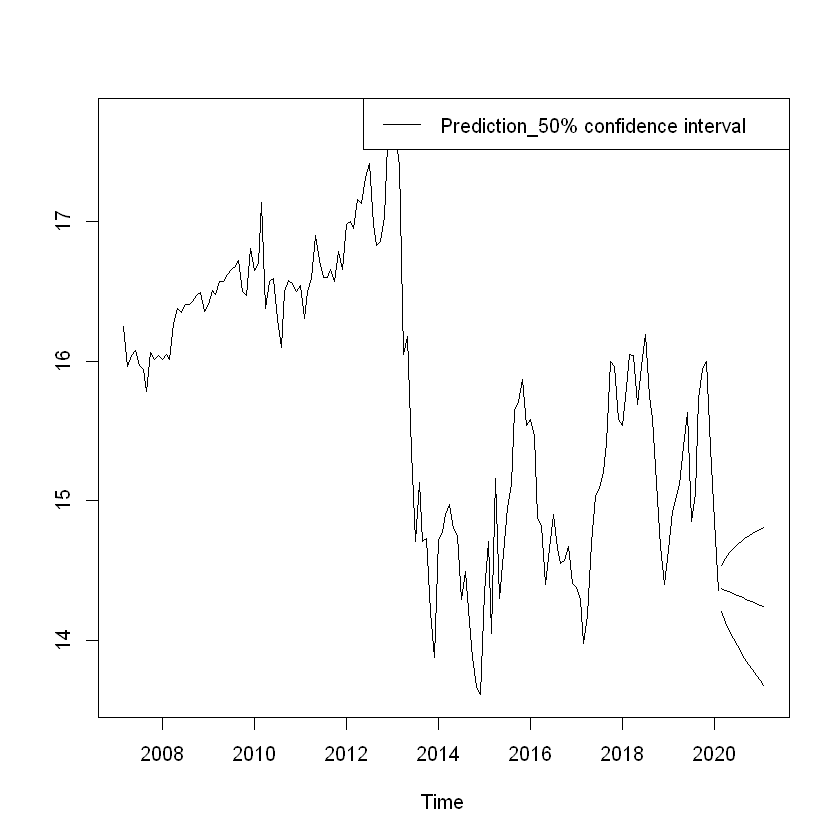

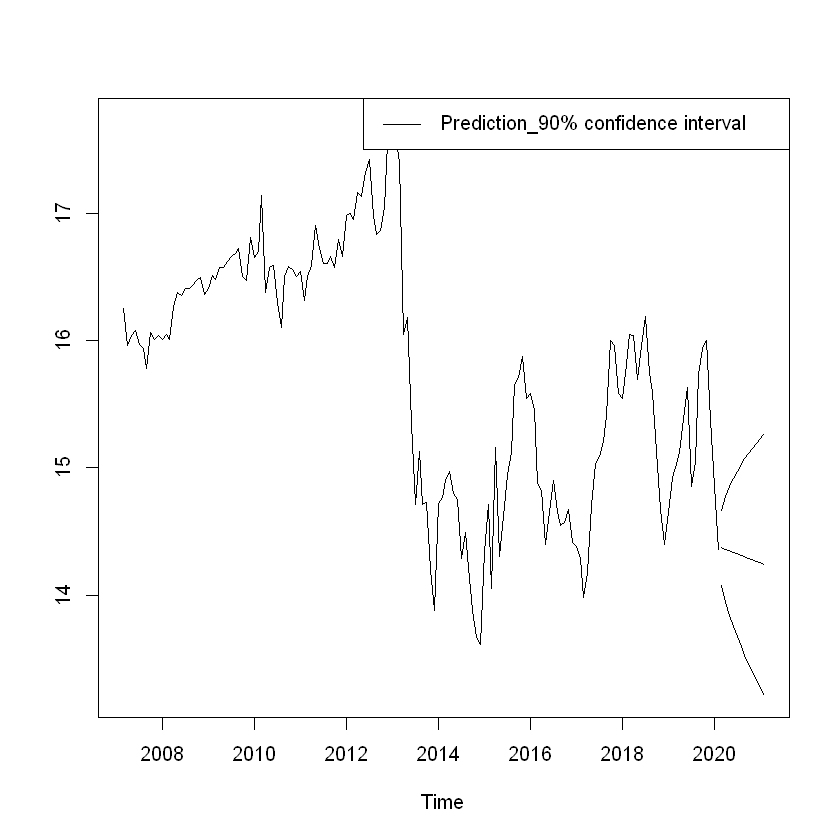

In [95]:
## local trend model
(fit2 <- StructTS(price, type = "trend")) ## constant trend fitted

## local BSM model
(fit3 <- StructTS(price, type = "BSM", fixed = c(0.1,0.001,NA,NA),
         optim.control = list(trace = TRUE)))

pred <- predict(fit2, n.ahead = 12)

## with 50% confidence interval
ts.plot(price, pred$pred,
        pred$pred + 0.5*pred$se, pred$pred - 0.5*pred$se)
legend('topright', lty=1, legend=c('Prediction_50% confidence interval'))
ts.plot(price, pred$pred,
        pred$pred + 0.9*pred$se, pred$pred - 0.9*pred$se)
legend('topright', lty=1, legend=c('Prediction_90% confidence interval'))


In [90]:
str(pred)

List of 2
 $ pred: Time-Series [1:12] from 2020 to 2021: 14.4 14.4 14.3 14.3 14.3 ...
 $ se  : Time-Series [1:12] from 2020 to 2021: 0.331 0.459 0.559 0.645 0.722 ...


In [89]:
pred

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,14.37067,14.35884,14.34702,14.33519,14.32336,14.31154,14.29971,14.28789,14.27606,14.26424
2021,14.25241,14.24059,,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,0.3305967,0.4586176,0.5591184,0.6450922,0.7217492,0.7917999,0.8568662,0.9180085,0.9759646,1.0312718
2021,1.0843355,1.1354703,,,,,,,,,,



## Forecasts for structural time series

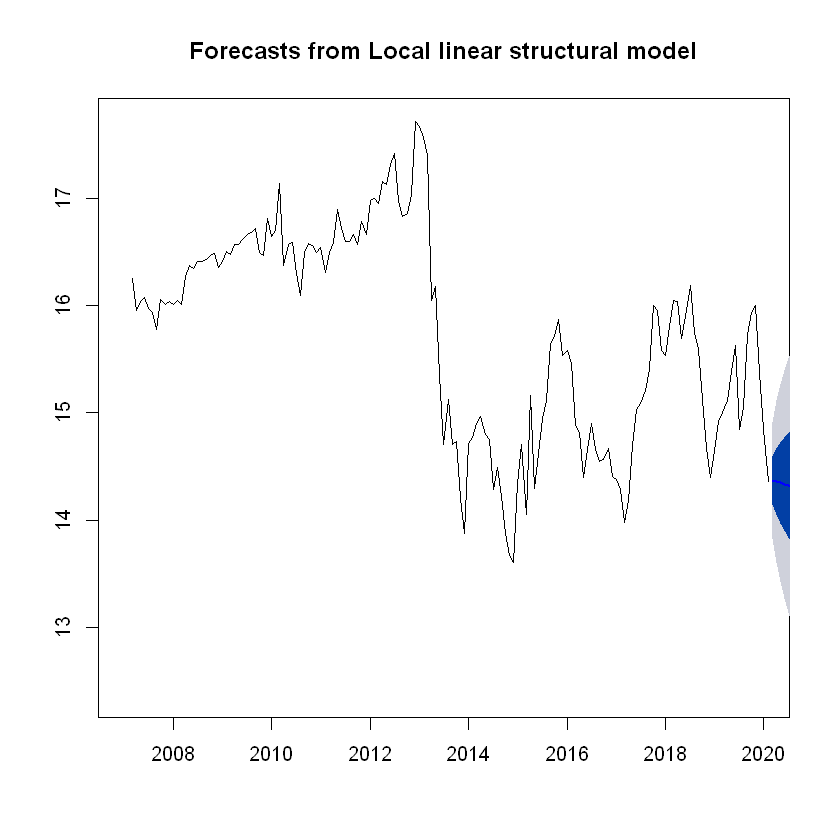

In [167]:
plot(forecast::forecast(fit2, level = c(50, 90), h = 12), xlim = c(2007, 2020))

## ARIMA Model

In [164]:
# recommended setting
auto.arima(price, trace = T, stepwise = F, approximation = F)


 ARIMA(0,1,0)                               : 98.39156
 ARIMA(0,1,0)            with drift         : 100.2328
 ARIMA(0,1,0)(0,0,1)[12]                    : 100.3994
 ARIMA(0,1,0)(0,0,1)[12] with drift         : 102.262
 ARIMA(0,1,0)(0,0,2)[12]                    : 100.7253
 ARIMA(0,1,0)(0,0,2)[12] with drift         : 102.5854
 ARIMA(0,1,0)(1,0,0)[12]                    : 100.4088
 ARIMA(0,1,0)(1,0,0)[12] with drift         : 102.2728
 ARIMA(0,1,0)(1,0,1)[12]                    : 102.5241
 ARIMA(0,1,0)(1,0,1)[12] with drift         : 104.4205
 ARIMA(0,1,0)(1,0,2)[12]                    : 102.5959
 ARIMA(0,1,0)(1,0,2)[12] with drift         : 104.5082
 ARIMA(0,1,0)(2,0,0)[12]                    : 100.8435
 ARIMA(0,1,0)(2,0,0)[12] with drift         : 102.7095
 ARIMA(0,1,0)(2,0,1)[12]                    : 102.3371
 ARIMA(0,1,0)(2,0,1)[12] with drift         : 104.2599
 ARIMA(0,1,0)(2,0,2)[12]                    : Inf
 ARIMA(0,1,0)(2,0,2)[12] with drift         : Inf
 ARIMA(0,1,1)       

Series: price 
ARIMA(3,1,2) 

Coefficients:
          ar1      ar2     ar3     ma1     ma2
      -1.3474  -0.6479  0.1310  1.3712  0.6981
s.e.   0.1777   0.2156  0.0982  0.1643  0.1594

sigma^2 estimated as 0.1026:  log likelihood=-41.19
AIC=94.38   AICc=94.95   BIC=112.64


	Ljung-Box test

data:  Residuals from ARIMA(3,1,2)
Q* = 11.259, df = 19, p-value = 0.9148

Model df: 5.   Total lags used: 24



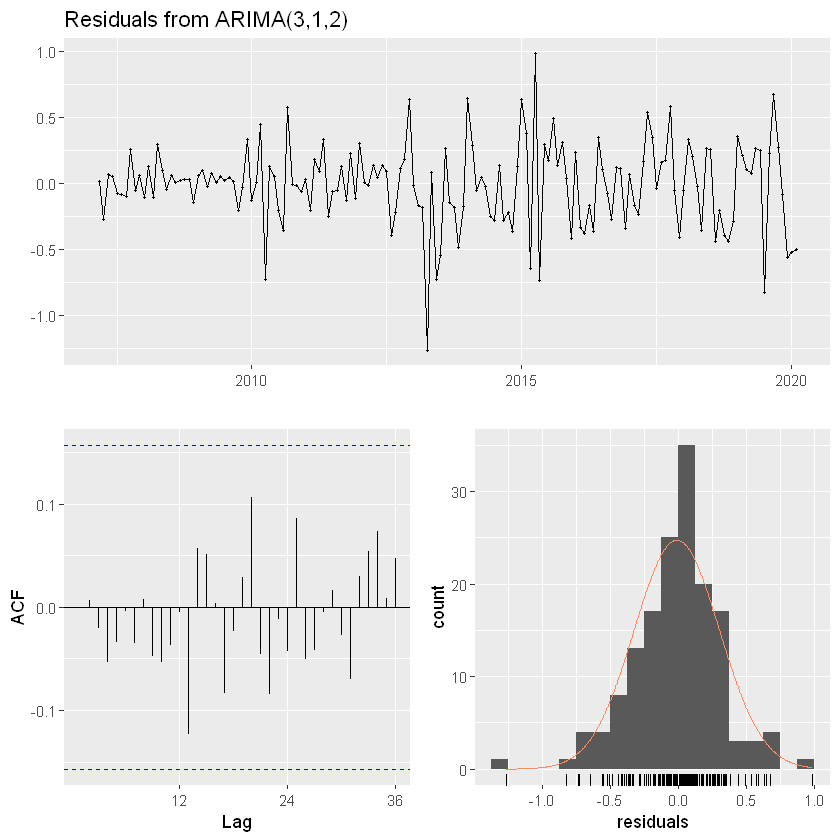

In [151]:
# Arima 
arima <- Arima(price, order = c(3,1,2))
checkresiduals(arima)

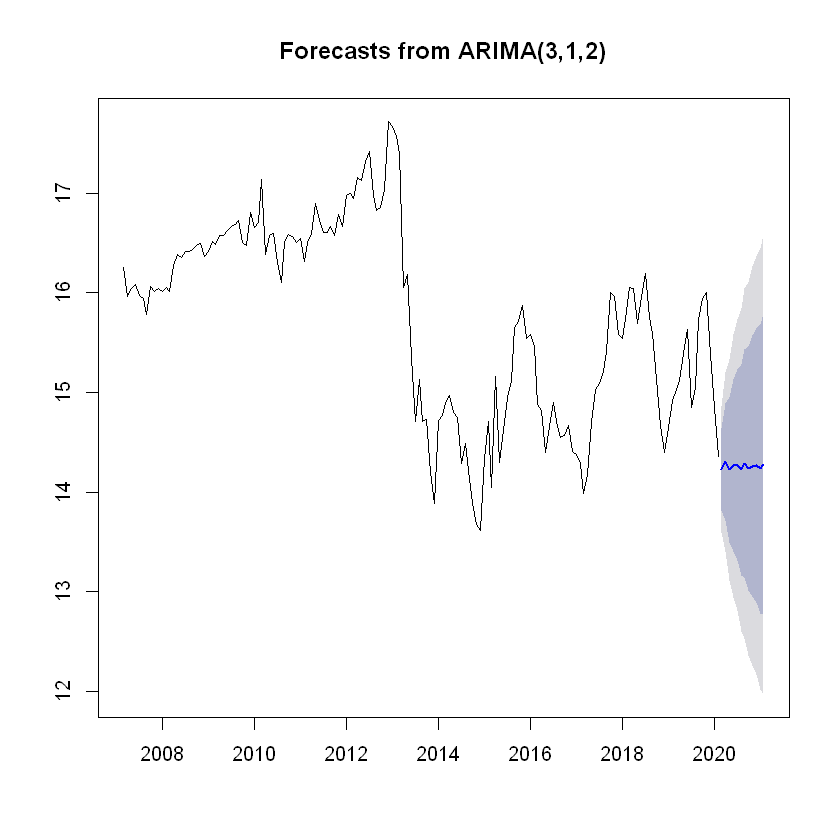

In [158]:
## ARIMA Forecasting

# Forecast of 10 years
arima_fore <- forecast::forecast(arima, h=12)
plot(arima_fore)

In [188]:
arima_fore

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2020       14.22558 13.81500 14.63616 13.59765 14.85350
Apr 2020       14.30226 13.71467 14.88986 13.40361 15.20092
May 2020       14.22185 13.49502 14.94868 13.11026 15.33343
Jun 2020       14.26291 13.39995 15.12587 12.94313 15.58270
Jul 2020       14.26973 13.31378 15.22567 12.80774 15.73172
Aug 2020       14.22340 13.16224 15.28457 12.60050 15.84631
Sep 2020       14.28678 13.14033 15.43324 12.53343 16.04014
Oct 2020       14.23229 13.00753 15.45705 12.35919 16.10539
Nov 2020       14.25859 12.95071 15.56646 12.25836 16.25881
Dec 2020       14.26676 12.89321 15.64032 12.16610 16.36743
Jan 2021       14.23157 12.78496 15.67818 12.01916 16.44397
Feb 2021       14.27714 12.76602 15.78825 11.96609 16.58819

## State-space models
State-space models are based on the idea that the time series (Yt) is an incomplete and noisy function of some underlying unobservable process (θt, t = 1, 2, . . .), called the state process. The first, important class of state-space models is given by Gaussian linear state-space models which is dynamic linear models (DLM).

### Dynamic Linear Model (DLM)
The basic aspects of DLM can be illustrated as:

Considering the problem of determining the position θ of an object, based on some measurements (Y1, Y2, . . .) affected
by random errors. here, our problem is dynamic problem and the position of the object which is "price" changes between two consecutive measurements. In this case we need to make an assumptions on the dynamics.
- the observable process (Yt; t = 1, 2, . . .) is thought of as determined by a latent process (θt; t = 1, 2, . . .), up to Gaussian random errors. If we knew the position of the object at successive time points, the Yt’s would be independent: what remain are only unpredictable measurement errors. Furthermore, the observation Yt depends only on the position #t of the target at time t;
- the latent process (θt) has a fairly simple dynamics: θt does not depend on the entire past trajectory but only on the previous position θt−1, through a linear relationship, up to Gaussian random errors;
- estimation and forecasting can be obtained sequentially, as new data become available. The example illustrates the role played by the modeling assumptions (in particular by the observational variance and system variance) in the updating mechanism.

The assumption of linearity and Gaussianity is specific of DLMs, but the dependence structure of the process (Yt) is what we assume in general statespace models.

DLM can be specified by means of two equations
- Yt = Ft θt + vt, vt ~ Nm(0, Vt); [observation equation]
- θt = Gt θt−1 + wt, wt ~ Np(0, Wt); [system equation]

here, Gt and Ft are known matrices and the (vt) and (wt) are two independent white noise sequences (i.e., they are independent, both between them and within each of them), with mean zero and known covariance matrices Vt and Wt respectively. 

The general state space model for a univariate time series (Yt, t = 1, 2, . . .) is the so-called random walk plus noise model, defined by:
- Yt = ht(θt, vt), vt ~ N(0, V )
- θt = gt(θt−1, wt), wt ~ N(0,W)

with arbitrary functions gt and ht which is more flexible. The error sequences (vt) and (wt) are independent, both within them and between them.

Linear state space models specify gt and ht as linear functions, and Gaussian linear models add the assumptions of Gaussian distributions. The assumption of Normality is sensible in many applications, and it can be justified by central limit theorem
arguments.

Intuitively, it is appropriate for time series showing no clear trend or seasonal variation: the observations (Yt) are modeled as random fluctuations (noisy observation) around a level (θt); in turn, the level can evolve randomly over time (described by a random walk). This is why the model is also called local level model; if W = 0, we are back to the constant mean model. Note that Yt is modeled as a noisy observation of the random walk θt, which is non-stationary. Indeed, DLM can be used for modeling non-stationary time series. On the contrary, the usual ARMA models require a preliminary transformation of the data for getting
stationarity.


In [173]:
# forecasting using dlm model

model <- function(p) {
    return(
      dlmModPoly(2, dV=p[1], dW=p[2:3]) +
      dlmModSeas(12, dV=p[4])
    )
}

# estimating parameters
mle <- dlmMLE(price, parm = c(0.1, 0.001, 1, 1), build = model)
if (mle$convergence == 0) print('converge') else print('did not converge')

[1] "converge"


In [174]:
str(model)

function (p)  
 - attr(*, "srcref")= 'srcref' int [1:8] 3 10 8 1 10 1 3 8
  ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x000000005be115d8> 


In [175]:
unlist(mle)

par1 
                             "-0.449999620416099" 
                                             par2 
                            "-0.0746247858644319" 
                                             par3 
                           "3.49581661451169e-09" 
                                             par4 
                              "0.450000379640634" 
                                            value 
                               "190.686393897781" 
                                  counts.function 
                                             "92" 
                                  counts.gradient 
                                             "92" 
                                      convergence 
                                              "0" 
                                          message 
"CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [176]:
mle$par

[1] -4.499996e-01 -7.462479e-02  3.495817e-09  4.500004e-01

In [177]:
modelfit = model(mle$par) # fitting the dlm model
str(modelfit)

List of 10
 $ m0 : num [1:13] 0 0 0 0 0 0 0 0 0 0 ...
 $ C0 : num [1:13, 1:13] 1e+07 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 0e+00 ...
 $ FF : num [1, 1:13] 1 0 1 0 0 0 0 0 0 0 ...
 $ V  : num [1, 1] 7.59e-07
 $ GG : num [1:13, 1:13] 1 0 0 0 0 0 0 0 0 0 ...
 $ W  : num [1:13, 1:13] -0.0746 0 0 0 0 ...
 $ JFF: NULL
 $ JV : NULL
 $ JGG: NULL
 $ JW : NULL
 - attr(*, "class")= chr "dlm"


The last number in the display is the variance of the filtering distribution of the 156-th state vector. Note that m0 and C0 are included in the output, which is the reason why U.C has one element more than U.R, and m and U.D one row more than a and D.R.
### Kalman smoother = dlmSmooth

The Kalman smoother allows to compute the densities of θt|DT , starting from t = T−1, in which case θT|DT ~ N(sT = mT , ST = CT ), and then proceeding backward for computing the densities of θt|DT for t = T−2, t = T−3, etc.

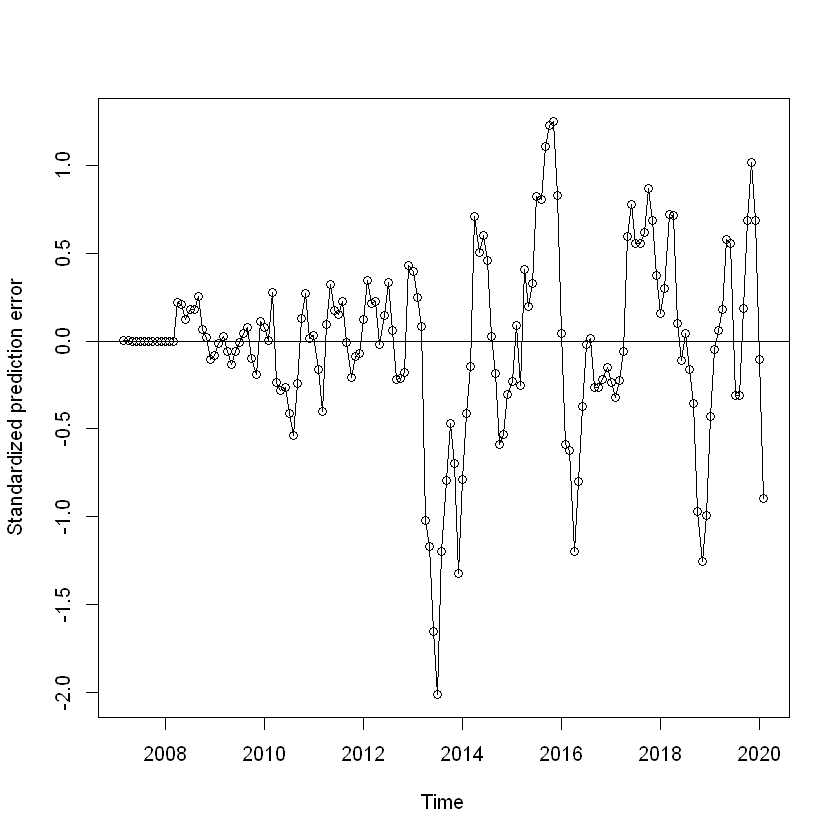

In [178]:
# applying kalman filter
modelfilter <- dlmFilter(price, modelfit)
plot(residuals(modelfilter, sd = FALSE), type = "o", ylab = "Standardized prediction error")
abline(h = 0)

In [706]:
str(modelfilter,1)

List of 9
 $ y  : Time-Series [1:156, 1] from 2007 to 2020: 16.2 16 16 16.1 16 ...
  ..- attr(*, ".indexCLASS")= chr "Date"
  ..- attr(*, "tclass")= chr "Date"
  ..- attr(*, ".indexTZ")= chr "UTC"
  ..- attr(*, "tzone")= chr "UTC"
  ..- attr(*, "src")= chr "yahoo"
  ..- attr(*, "updated")= POSIXct[1:1], format: "2020-03-01 18:59:16"
  ..- attr(*, "index")= num [1:156] 1.17e+09 1.17e+09 1.17e+09 1.17e+09 1.17e+09 ...
  .. ..- attr(*, "tzone")= chr "UTC"
  .. ..- attr(*, "tclass")= chr "Date"
  ..- attr(*, "dimnames")=List of 2
 $ mod:List of 10
  ..- attr(*, "class")= chr "dlm"
 $ m  : Time-Series [1:157, 1:13] from 2007 to 2020: 0 2.41 14.46 18.09 19.73 ...
 $ U.C:List of 157
 $ D.C: num [1:157, 1:13] 3.16e+03 6.16e-04 6.16e-04 6.16e-04 6.16e-04 ...
 $ a  : Time-Series [1:156, 1:13] from 2007 to 2020: 0 3.59 20.05 22.96 23.54 ...
 $ U.R:List of 156
 $ D.R: num [1:156, 1:13] 10916 8162 5192 4498 4165 ...
 $ f  : Time-Series [1:156, 1] from 2007 to 2020: 0 2.34 19.16 22.01 22.5 ...
  ..-

In [179]:
# applying kalman smoother
modelsmoothed <- dlmSmooth(price, modelfit)
str(modelsmoothed,1)

List of 3
 $ s  : Time-Series [1:157, 1:13] from 2007 to 2020: 16 16 16 16 16 ...
 $ U.S:List of 157
 $ D.S: num [1:157, 1:13] 1.99 1.98 1.98 1.97 1.96 ...


In [180]:
with(modelsmoothed, drop(dlmSvd2var(U.S[[157]], D.S[157,])))

0.150483379,9.838360e-04,-0.1504832391,-0.0886505162,-0.043915673,-1.440447e-02,3.566402e-03,1.366240e-02,0.0187522335,0.0207124215,0.0204837975,0.0181860325,0.0132080792
0.000983836,4.943250e-04,-0.0009838351,-0.0005795771,-0.000287104,-9.416241e-05,2.332847e-05,8.933252e-05,0.0001226051,0.0001354151,0.0001339146,0.0001188873,0.0000863395
-0.150483239,-9.838351e-04,0.1504838582,0.0886504020,0.043915591,1.440442e-02,-3.566435e-03,-1.366242e-02,-0.0187522426,-0.0207124249,-0.0204837969,-0.0181860280,-0.0132080700
-0.088650516,-5.795771e-04,0.0886504020,0.0992964926,0.051725401,1.963436e-02,-3.156878e-04,-1.177382e-02,-0.0177366818,-0.0202491867,-0.0204153965,-0.0185020095,-0.0140326474
-0.043915673,-2.871040e-04,0.0439155909,0.0517254013,0.072660154,3.420998e-02,9.016060e-03,-6.235924e-03,-0.0147125748,-0.0188162671,-0.0200346932,-0.0189856286,-0.0155058196
-0.014404473,-9.416241e-05,0.0144044193,0.0196343640,0.034209982,6.114255e-02,2.722781e-02,5.123246e-03,-0.0081681880,-0.0154223000,-0.0186750566,-0.0190943825,-0.0170153381
0.003566402,2.332847e-05,-0.0035664353,-0.0003156878,0.009016060,2.722781e-02,5.690993e-02,2.486805e-02,0.0039520219,-0.0085982856,-0.0153365547,-0.0181049058,-0.0178998836
0.013662397,8.933252e-05,-0.0136624151,-0.0117738166,-0.006235924,5.123246e-03,2.486805e-02,5.559440e-02,0.0242151895,0.0037123690,-0.0085503459,-0.0150185630,-0.0174388584
0.018752234,1.226051e-04,-0.0187522426,-0.0177366818,-0.014712575,-8.168188e-03,3.952022e-03,2.421519e-02,0.0552704796,0.0240963794,0.0037363014,-0.0083923908,-0.0146878868
0.020712422,1.354151e-04,-0.0207124249,-0.0202491867,-0.018816267,-1.542230e-02,-8.598286e-03,3.712369e-03,0.0240963794,0.0552270083,0.0241053276,0.0037944509,-0.0082708490
0.020483798,1.339146e-04,-0.0204837969,-0.0204153965,-0.020034693,-1.867506e-02,-1.533655e-02,-8.550346e-03,0.0037363014,0.0241053276,0.0552255087,0.0240939931,0.0037704171


In [181]:
with(modelsmoothed, drop(dlmSvd2var(U.S[[51]], D.S[51,])))

4.615358e-02,-3.365652e-06,-4.615342e-02,-1.661779e-02,1.384137e-04,8.251525e-03,1.126363e-02,1.152732e-02,1.028902e-02,8.026296e-03,4.838549e-03,8.251725e-04,-3.575274e-03
-3.365652e-06,4.942024e-04,3.365667e-06,-1.153551e-06,-6.060855e-06,-1.007118e-05,-1.195132e-05,-1.085745e-05,-6.618323e-06,1.120898e-07,7.891561e-06,1.474504e-05,1.862005e-05
-4.615342e-02,3.365667e-06,4.615402e-02,1.661766e-02,-1.385016e-04,-8.251577e-03,-1.126365e-02,-1.152734e-02,-1.028903e-02,-8.026305e-03,-4.838557e-03,-8.251763e-04,3.575280e-03
-1.661779e-02,-1.153551e-06,1.661766e-02,4.616031e-02,1.662448e-02,-1.329194e-04,-8.248942e-03,-1.126514e-02,-1.153319e-02,-1.029836e-02,-8.037125e-03,-4.848135e-03,-8.306576e-04
1.384137e-04,-6.060855e-06,-1.385016e-04,1.662448e-02,4.616771e-02,1.663054e-02,-1.300602e-04,-8.250552e-03,-1.127149e-02,-1.154331e-02,-1.031010e-02,-8.047515e-03,-4.854081e-03
8.251525e-03,-1.007118e-05,-8.251577e-03,-1.329194e-04,1.663054e-02,4.617267e-02,1.663287e-02,-1.313778e-04,-8.255747e-03,-1.127977e-02,-1.155292e-02,-1.031860e-02,-8.052380e-03
1.126363e-02,-1.195132e-05,-1.126365e-02,-8.248942e-03,-1.300602e-04,1.663287e-02,4.617377e-02,1.663225e-02,-1.338307e-04,-8.259657e-03,-1.128430e-02,-1.155693e-02,-1.032090e-02
1.152732e-02,-1.085745e-05,-1.152734e-02,-1.126514e-02,-8.250552e-03,-1.313778e-04,1.663225e-02,4.617412e-02,1.663363e-02,-1.316288e-04,-8.257103e-03,-1.128204e-02,-1.155563e-02
1.028902e-02,-6.618323e-06,-1.028903e-02,-1.153319e-02,-1.127149e-02,-8.255747e-03,-1.338307e-04,1.663363e-02,4.617957e-02,1.664232e-02,-1.215596e-04,-8.248190e-03,-1.127694e-02
8.026296e-03,1.120898e-07,-8.026305e-03,-1.029836e-02,-1.154331e-02,-1.127977e-02,-8.259657e-03,-1.316288e-04,1.664232e-02,4.619341e-02,1.665837e-02,-1.073525e-04,-8.240058e-03
4.838549e-03,7.891561e-06,-4.838557e-03,-8.037125e-03,-1.031010e-02,-1.155292e-02,-1.128430e-02,-8.257103e-03,-1.215596e-04,1.665837e-02,4.621202e-02,1.667484e-02,-9.792271e-05


In [182]:
with(modelfilter, drop(dlmSvd2var(U.C[[51]], D.C[51,])))

0.155422826,3.348082e-03,-0.155422682,-0.0916663732,-0.045542067,-0.0150985331,3.478494e-03,0.0139747662,0.0193407327,0.0214904806,0.0213644640,0.0190550537,0.0139088465
0.003348082,1.659668e-03,-0.003348078,-0.0019960359,-0.001022954,-0.0003823684,1.264033e-05,0.0002468454,0.0003840596,0.0004621175,0.0004945061,0.0004743744,0.0003789099
-0.155422682,-3.348078e-03,0.155423296,0.0916662563,0.045541983,0.0150984783,-3.478527e-03,-0.0139747843,-0.0193407414,-0.0214904834,-0.0213644627,-0.0190550485,-0.0139088366
-0.091666373,-1.996036e-03,0.091666256,0.1011605855,0.052755695,0.0200991616,-2.287996e-04,-0.0119490600,-0.0181040931,-0.0207558483,-0.0210016913,-0.0190862711,-0.0145047612
-0.045542067,-1.022954e-03,0.045541983,0.0527556950,0.073259080,0.0345119258,9.109704e-03,-0.0063003784,-0.0149064631,-0.0191143073,-0.0204006326,-0.0193641769,-0.0158214683
-0.015098533,-3.823684e-04,0.015098478,0.0200991616,0.034511926,0.0613307003,2.732782e-02,0.0051425823,-0.0082297748,-0.0155615492,-0.0188763404,-0.0193252113,-0.0172270986
0.003478494,1.264033e-05,-0.003478527,-0.0002287996,0.009109704,0.0273278195,5.700639e-02,0.0249442022,0.0039895544,-0.0086128414,-0.0154061440,-0.0182185806,-0.0180329485
0.013974766,2.468454e-04,-0.013974784,-0.0119490600,-0.006300378,0.0051425823,2.494420e-02,0.0557000281,0.0243231964,0.0037980639,-0.0085059131,-0.0150253389,-0.0174959605
0.019340733,3.840596e-04,-0.019340741,-0.0181040931,-0.014906463,-0.0082297748,3.989554e-03,0.0243231964,0.0554207731,0.0242591216,0.0038806760,-0.0082952160,-0.0146608149
0.021490481,4.621175e-04,-0.021490483,-0.0207558483,-0.019114307,-0.0155615492,-8.612841e-03,0.0037980639,0.0242591216,0.0554382462,0.0243284942,0.0039866327,-0.0081537902
0.021364464,4.945061e-04,-0.021364463,-0.0210016913,-0.020400633,-0.0188763404,-1.540614e-02,-0.0085059131,0.0038806760,0.0243284942,0.0554928096,0.0243564410,0.0039693449


In [184]:
modelsmoothed = rapply(modelsmoothed, f=function(x) ifelse(is.nan(x),0,x), how="replace" )

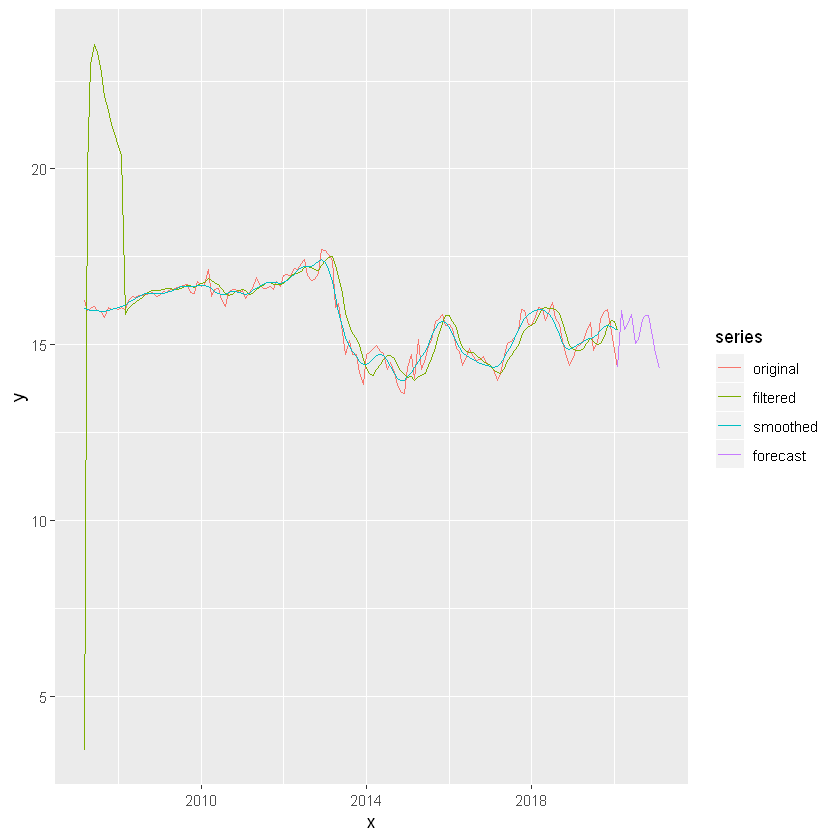

In [186]:
n <- 1*12
forecast <- dlmForecast(modelfilter, nAhead=n)
 
x <- index(price)
xf <- seq(max(x), max(x)+n/12, 1/12)
aa <- forecast$a[, -1] * (-1)
aa <- cbind(forecast$a[, 1], aa)
a <- drop(forecast$a%*%t(FF(modelfit)))
a <- c(tail(price, 1), a)
df <- rbind(
  data.frame(x=x, y=as.numeric(price), series="original"),
  data.frame(x=x, y=apply(modelfilter$m[-1, 1:2], 1, sum), series="filtered"),
  data.frame(x=x, y=apply(modelsmoothed$s[-1, 1:2], 1, sum), series="smoothed"),
  data.frame(x=xf, y=a, series="forecast")
)
dlm <- ggplot(subset(df, x>2000), aes(x=x, y=y, colour=series)) + geom_line()
dlm

In [187]:
forecast$f


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,15.96481,15.42814,15.64236,15.84709,15.03161,15.14927,15.71302,15.81821,15.82771,15.22855
2021,14.75860,14.31305,,,,,,,,,,
